# Descarga de históricos de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Entonces, en la clase anterior vimos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> Estas medidas se pueden calcular cuando tenemos escenarios probables de la economía y conocemos sus probabilidades de ocurrencia. Ahora, si no conocemos dichos escenarios, ¿qué podemos hacer?

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [2]:
# Importamos pandas
import pandas as pd

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [12]:
# Función read_csv
closes = pd.read_csv('Precios/AAPL.csv', index_col='Date', usecols=['Date', 'Adj Close'])

In [13]:
# Cargamos hoja de calculo en un dataframe
closes.head()

,Adj Close
Date,
2015-01-02,102.319397
2015-01-05,99.436890
2015-01-06,99.446251
2015-01-07,100.840714
2015-01-08,104.715256


#### Anotación #1
- Quisieramos indizar por fecha.

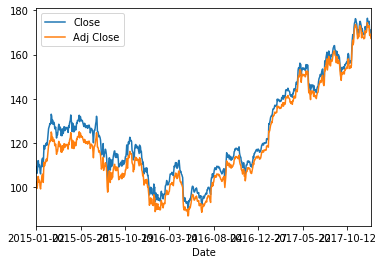

In [7]:
# Cargamos hoja de calculo en un dataframe
closes[['Close','Adj Close']].plot()

In [5]:
# Graficar precios de cierre y precios de cierre ajustados


#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [6]:
# Cargamos hoja de calculo en un dataframe


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,GFNORTEO.MX,GFINBURO.MX) y contengan los datos de precio de cierre.

In [31]:
AAPL = pd.read_csv('precios/AAPL.csv', usecols =['Date','Adj Close'], index_col='Date')
AMZN = pd.read_csv('precios/AMZN.csv', usecols =['Date','Adj Close'], index_col='Date')
NFLX = pd.read_csv('precios/NFLX.csv', usecols =['Date','Adj Close'], index_col='Date')
TSLA = pd.read_csv('precios/TSLA.csv', usecols =['Date','Adj Close'], index_col='Date')

AAPL.rename(columns={'Adj Close':'AAPL'}, inplace=True)
AMZN.rename(columns={'Adj Close':'AMZN'}, inplace=True)
NFLX.rename(columns={'Adj Close':'NFLX'}, inplace=True)
TSLA.rename(columns={'Adj Close':'TSLA'}, inplace=True)

In [35]:
AdjCloses = AAPL.join(AMZN, how='inner').join(NFLX, how='inner').join(TSLA, how='inner')


In [36]:
AdjCloses

,AAPL,AMZN,NFLX,TSLA
Date,,,,
2015-01-02,102.319397,308.519989,49.848572,219.309998
2015-01-05,99.436890,302.190002,47.311428,210.089996
2015-01-06,99.446251,295.290009,46.501427,211.279999
2015-01-07,100.840714,298.420013,46.742859,210.949997
2015-01-08,104.715256,300.459991,47.779999,210.619995
2015-01-09,104.827553,296.929993,47.041428,206.660004
2015-01-12,102.244522,291.410004,45.547142,202.210007
2015-01-13,103.152313,294.739990,46.255714,204.250000
2015-01-14,102.759262,293.269989,46.320000,192.690002


## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [37]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas_datareader as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [7]:
# Función DataReader


- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: necesita registrarse para obtener un api key.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [8]:
# Ejemplo google finance


In [9]:
# Ejemplo iex


In [39]:
# Ejemplo yahoo
web.DataReader(['AAPL', 'AMZN', 'NFLX', 'TSLA'], data_source='yahoo', start='2015-01-01')

Attributes   Adj Close                                            Close  \
Symbols           AAPL         AMZN        NFLX        TSLA        AAPL   
Date                                                                      
2015-01-02  100.454300   308.519989   49.848572  219.309998  109.330002   
2015-01-05   97.624336   302.190002   47.311428  210.089996  106.250000   
2015-01-06   97.633545   295.290009   46.501427  211.279999  106.260002   
2015-01-07   99.002556   298.420013   46.742859  210.949997  107.750000   
2015-01-08  102.806480   300.459991   47.779999  210.619995  111.889999   
2015-01-09  102.916725   296.929993   47.041428  206.660004  112.010002   
2015-01-12  100.380791   291.410004   45.547142  202.210007  109.250000   
2015-01-13  101.272049   294.739990   46.255714  204.250000  110.220001   
2015-01-14  100.886154   293.269989   46.320000  192.690002  109.800003   
2015-01-15   98.148056   286.950012   46.251427  191.869995  106.820000   
2015-01-16   97.385445   290.739990   48.191429  193.070007  105.989998   
2015-01-20   99.893822   289.440002   49.828571  191.929993  108.720001   
2015-01-21  100.656441   297.250000   58.468571  196.570007  109.550003   
2015-01-22  103.275063   310.320007   61.205715  201.619995  112.400002   
2015-01-23  103.807991   312.390015   62.494286  201.289993  112.980003   
2015-01-26  103.918228   309.660004   63.794285  206.550003  113.099998   
2015-01-27  100.279716   306.750000   64.881432  205.979996  109.139999   
2015-01-28  105.948822   303.910004   63.208572  199.369995  115.309998   
2015-01-29  109.247391   311.779999   63.400002  205.199997  118.900002   
2015-01-30  107.648643   354.529999   63.114285  203.600006  117.160004   
2015-02-02  108.999298   364.470001   63.009998  210.940002  118.629997   
2015-02-03  109.017654   363.549988   65.274284  218.360001  118.650002   
2015-02-04  109.853806   364.750000   64.101425  218.550003  119.559998   
2015-02-05  110.637886   373.890015   64.129997  220.990005  119.940002   
2015-02-06  109.706200   374.279999   63.480000  217.360001  118.930000   
2015-02-09  110.434944   370.559998   63.295715  217.479996  119.720001   
2015-02-10  112.556557   373.000000   64.849998  216.289993  122.019997   
2015-02-11  115.194748   375.140015   64.984283  212.800003  124.879997   
2015-02-12  116.652199   377.170013   65.247147  202.880005  126.459999   
2015-02-13  117.224121   381.829987   66.585716  203.770004  127.080002   
...                ...          ...         ...         ...         ...   
2019-12-26  289.910004  1868.770020  332.630005  430.940002  289.910004   
2019-12-27  289.799988  1869.800049  329.089996  430.380005  289.799988   
2019-12-30  291.519989  1846.890015  323.309998  414.700012  291.519989   
2019-12-31  293.649994  1847.839966  323.570007  418.329987  293.649994   
2020-01-02  300.350006  1898.010010  329.809998  430.260010  300.350006   
2020-01-03  297.429993  1874.969971  325.899994  443.010010  297.429993   
2020-01-06  299.799988  1902.880005  335.829987  451.540009  299.799988   
2020-01-07  298.390015  1906.859985  330.750000  469.059998  298.390015   
2020-01-08  303.190002  1891.969971  339.260010  492.140015  303.190002   
2020-01-09  309.630005  1901.050049  335.660004  481.339996  309.630005   
2020-01-10  310.329987  1883.160034  329.049988  478.149994  310.329987   
2020-01-13  316.959991  1891.300049  338.920013  524.859985  316.959991   
2020-01-14  312.679993  1869.439941  338.690002  537.919983  312.679993   
2020-01-15  311.339996  1862.020020  339.070007  518.500000  311.339996   
2020-01-16  315.239990  1877.939941  338.619995  513.489990  315.239990   
2020-01-17  318.730011  1864.719971  339.670013  510.500000  318.730011   
2020-01-21  316.570007  1892.000000  338.109985  547.200012  316.570007   
2020-01-22  317.700012  1887.459961  326.000000  569.559998  317.700012   
2020-01-23  319.230011  1884.579956  349.600006  572.200012  319.230011   
2020-01-24  318.309998  1

Sin embargo no se pueden descargar varios a la vez. Intentémoslo hacer nosotros así sea de manera rudimentaria:

In [40]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [43]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
closes = get_adj_closes(['AAPL', 'MSFT', 'NVDA', '^GSPC'], start_date = '2015-01-01')
closes.head()

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,100.454300,41.979183,19.406757,2058.199951
2015-01-05,97.624336,41.593143,19.078981,2020.579956
2015-01-06,97.633545,40.982681,18.500534,2002.609985
2015-01-07,99.002556,41.503380,18.452328,2025.900024
2015-01-08,102.806480,42.724323,19.146456,2062.139893


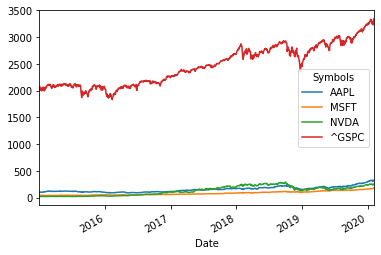

In [44]:
# Gráfico
closes.plot()

**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

### ¡Oh, si!

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>